# Comparing our duration and amplitude values to those of the Hawley distributions they were derived from

This script takes the Hawley values of duration and amplitude (these were created from a web plot digitizer) and plots the points with a fitted line. The coefficients of these lines are then used to draw Hawley values in the flare injection code. The second half of this code plots our values of amplitude and duration so that we can make sure this was done correctly.

In [197]:
# Import Modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from numpy import polyfit

In [207]:
# Loading the hawley values of duration and amplitude
durations = pd.read_csv('/Users/jess/Sf_m_dwarfs/sf_other_works/duration_data_hawley.csv')['duration']
energy_dur = pd.read_csv('/Users/jess/Sf_m_dwarfs/sf_other_works/duration_data_hawley.csv')['energy']
amplitudes = pd.read_csv('/Users/jess/sf_m_dwarfs/sf_other_works/amplitude_data_hawley.csv')['amplitude']
energy_amp = pd.read_csv('/Users/jess/sf_m_dwarfs/sf_other_works/amplitude_data_hawley.csv')['energies']

# Loading our values of duration and amplitude
flares = pd.read_csv('/Users/jess/sf_m_dwarfs/sf_data_files/run_5/final_seen_flares.csv')
our_duration = flares[' duration']
our_amplitudes = flares[' flare_amplitudes']
our_energies = flares[' energy']

In [203]:
# Defining function to fit line
def f(x, A, B): 
    return (A * x) + B

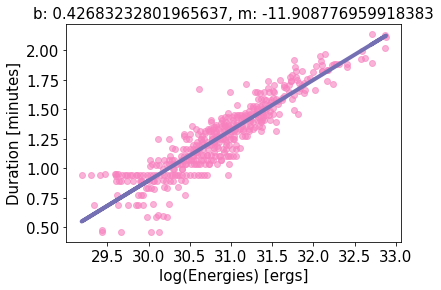

In [204]:
plt.scatter(energy_dur, np.log10(durations), alpha=0.6, color='#f781bf')

popt, pcov = curve_fit(f, energy_dur, np.log10(durations)) # your data x, y to fit
y = ((popt[0] * energy_dur) + popt[1])
plt.plot(energy_dur, y, color='#7570b3', linewidth=4)

plt.title('b: ' + str(popt[0]) + ', m: ' + str(popt[1]), fontsize=15)
plt.ylabel('Duration [minutes]', fontsize=15)
plt.xlabel('log(Energies) [ergs]', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('/Users/jess/sf_m_dwarfs/sf_plots/P_hawley_durations.png')
plt.show()

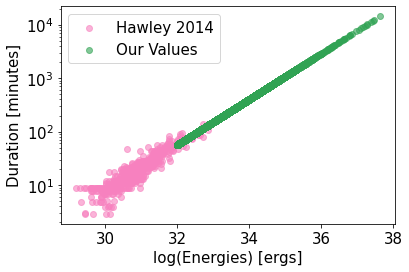

In [200]:
plt.scatter(energy_dur, durations, alpha=0.6, color='#f781bf', label='Hawley 2014')
plt.yscale('log')
plt.scatter(np.log10(our_energies), our_duration, color='#31a354', alpha=0.6, label='Our Values')

plt.ylabel('Duration [minutes]', fontsize=15)
plt.legend(fontsize=15)
plt.xlabel('log(Energies) [ergs]', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('/Users/jess/sf_m_dwarfs/sf_plots/P_hawley_durations_compare.png')
plt.show()

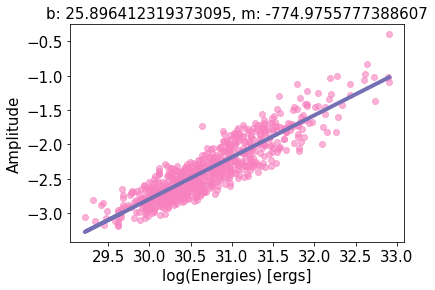

In [205]:
plt.scatter(energy_amp, np.log10(amplitudes), alpha=0.6, color='#f781bf')

popt, pcov = curve_fit(f, energy_amp, np.log10(amplitudes)) # your data x, y to fit
y = ((popt[0] * energy_amp) + popt[1])
plt.plot(energy_amp, y, color='#7570b3', linewidth=4)

plt.title('b: ' + str(b) + ', m: ' + str(m), fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.xlabel('log(Energies) [ergs]', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('/Users/jess/sf_m_dwarfs/sf_plots/P_hawley_amplitudes.png')
plt.show()

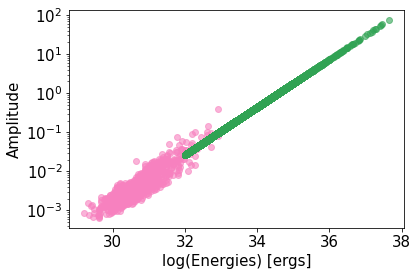

In [206]:
plt.scatter(energy_amp, amplitudes, alpha=0.6, color='#f781bf')
plt.yscale('log')
plt.scatter(np.log10(our_energies), our_amplitudes, color='#31a354', alpha=0.6)

plt.ylabel('Amplitude', fontsize=15)
plt.xlabel('log(Energies) [ergs]', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('/Users/jess/sf_m_dwarfs/sf_plots/P_hawley_amplitudes_comparison.png')
plt.show()